In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import os

import warnings
warnings.filterwarnings("ignore")

Data: [Kaggle Data Link](https://www.kaggle.com/datasets/muhammadrehan00/chest-xray-dataset/data)

In [37]:
path_train = '/kaggle/input/chest-xray-dataset/train'
path_val = '/kaggle/input/chest-xray-dataset/val'
path_test = '/kaggle/input/chest-xray-dataset/train'

class_labels = os.listdir(path_train)
total_class = len(class_labels)
class_labels

['pneumonia', 'tuberculosis', 'normal']

In [38]:
label_count_train = {}
label_count_val = {}
train_size=test_size=val_size=0

for clss in class_labels:
    clss_size_train = len(os.listdir(os.path.join(path_train,clss)))
    train_size += clss_size_train
    label_count_train[clss] = clss_size_train
    
    clss_size_val = len(os.listdir(os.path.join(path_val,clss)))
    val_size += clss_size_val
    label_count_val[clss] = clss_size_val
    
    test_size += len(os.listdir(os.path.join(path_test,clss)))


Text(0.5, 1.0, 'Test, Val & Train distribution')

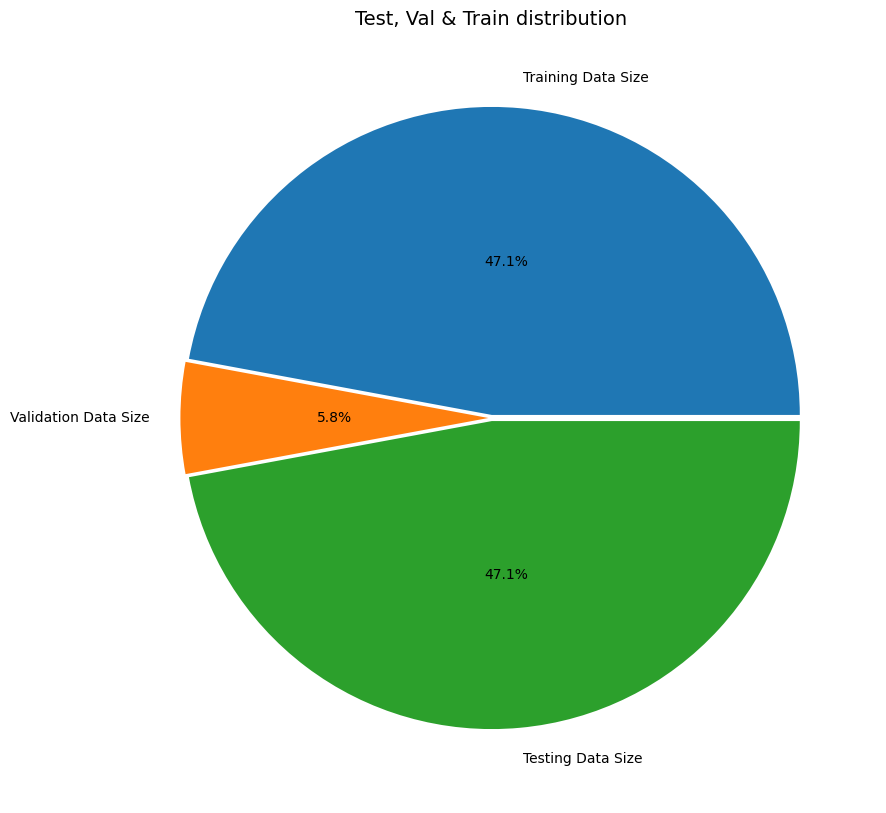

In [39]:
plt.figure(figsize=(15,10))
plt.pie(x=np.array([train_size, val_size, test_size]),
       autopct="%.1f%%",
       explode=[0.01,0.01,0.01],
       labels=['Training Data Size','Validation Data Size','Testing Data Size'],
       pctdistance=0.5)
plt.title('Test, Val & Train distribution', fontsize=14)

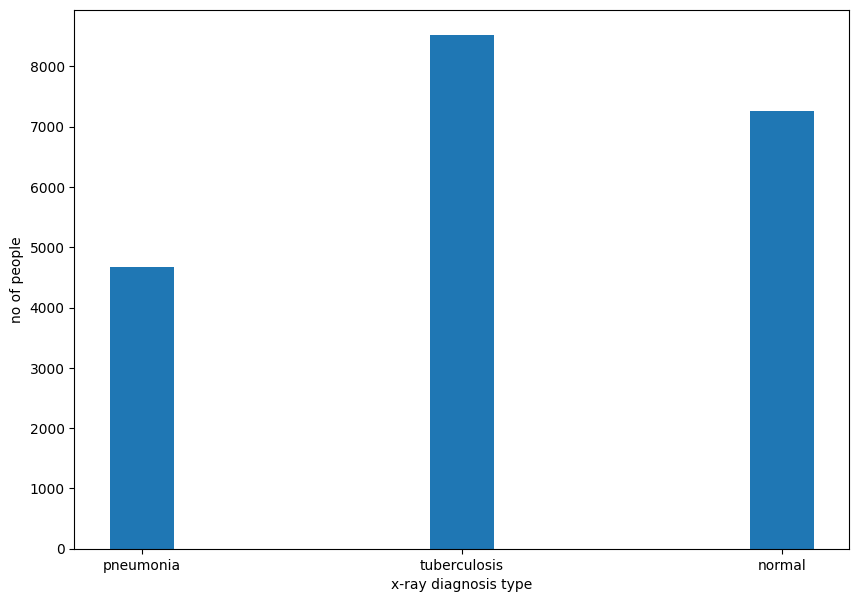

In [40]:
plt.figure(figsize=(10,7))
plt.bar(list(label_count_train.keys()),
       list(label_count_train.values()),
       width=0.2,
       align="center")

plt.xlabel("x-ray diagnosis type")
plt.ylabel("no of people")
plt.show()

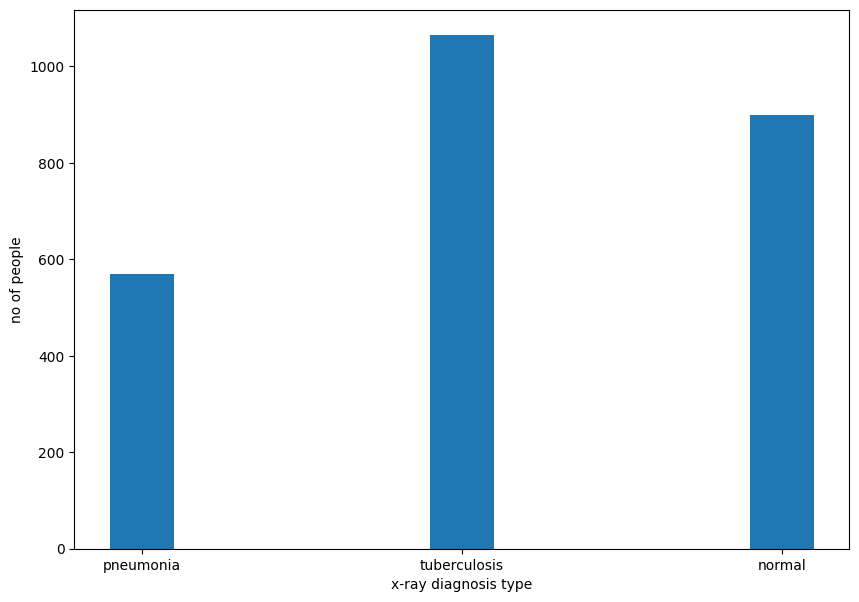

In [41]:
plt.figure(figsize=(10,7))
plt.bar(list(label_count_val.keys()),
       list(label_count_val.values()),
       width=0.2,
       align="center")

plt.xlabel("x-ray diagnosis type")
plt.ylabel("no of people")
plt.show()

In [48]:
img_shape = (64, 64)
batch = 64
input_shape=(64,64,3)

train_set= image_dataset_from_directory(
    path_train,
    label_mode="categorical",
    batch_size=batch,
    image_size=img_shape,
    shuffle=True,
)

val_set=image_dataset_from_directory(
    path_val,
    label_mode="categorical",
    batch_size=batch,
    image_size=img_shape,
    shuffle=True,
)

test_set=image_dataset_from_directory(
    path_test,
    label_mode="categorical",
    class_names=None,
    batch_size=batch,
    image_size=img_shape,
    shuffle=False
)

Found 20450 files belonging to 3 classes.
Found 2534 files belonging to 3 classes.
Found 20450 files belonging to 3 classes.


In [54]:
def transfer_learning():
    base_model=DenseNet121(include_top=False,input_shape=input_shape, weights="imagenet")
    
    return base_model


def create_model():
    model=Sequential()
    
    base_model=transfer_learning()
    model.add(base_model)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.2))
    
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.01))
    
    model.add(Dense(total_class,activation="softmax",name="classification"))
    
    model.summary()
    
    return model

In [55]:
model=create_model()

model.compile(optimizer="adam", 
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC()])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 2, 2, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,959,875 (30.36 MB)

 Trainable params: 7,876,227 (30.05 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [57]:
history = model.fit(x = train_set,validation_data=val_set,epochs = 1)

320/320 ━━━━━━━━━━━━━━━━━━━━ 714s 2s/step - auc_1: 0.9241 - loss: 0.4824 - val_auc_1: 0.9331 - val_loss: 0.4429


In [58]:
y_true =  np.array([])

for x, y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])

In [59]:
y_pred=model.predict(test_set)

320/320 ━━━━━━━━━━━━━━━━━━━━ 221s 668ms/step


In [60]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_labels):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

ROC AUC score: 0.9383513853934398


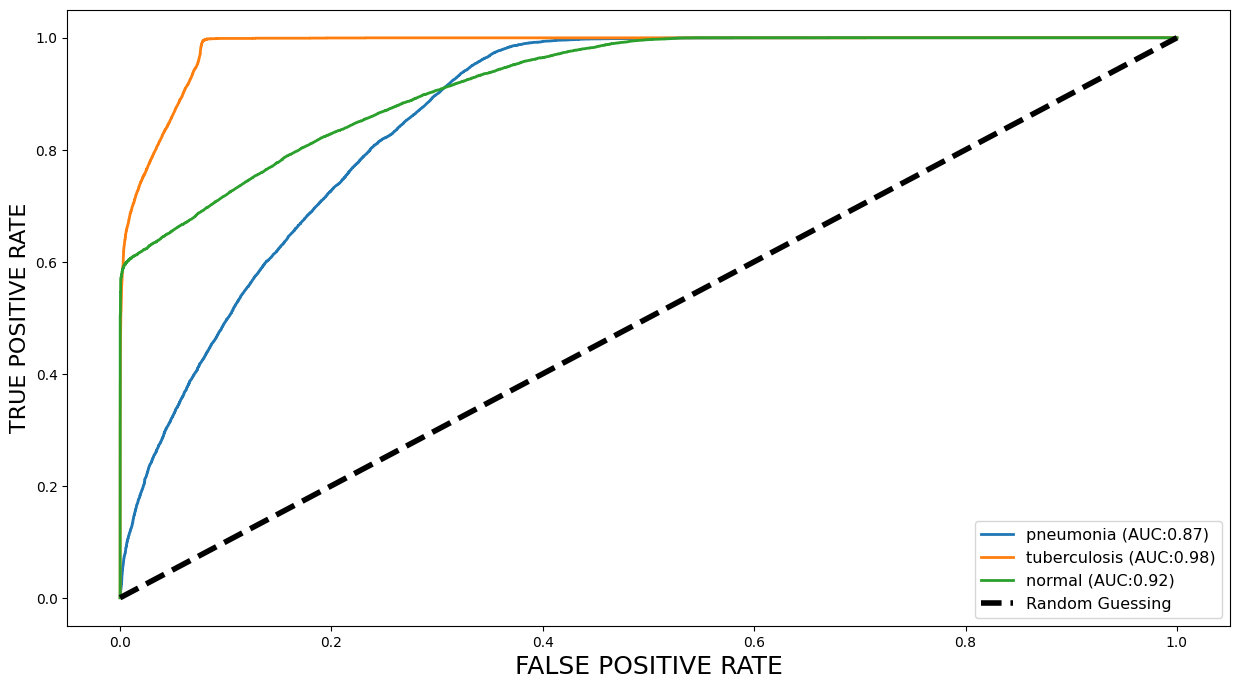

In [61]:
fig, c_ax = plt.subplots(1,1, figsize = (15,8))


print('ROC AUC score:', multiclass_roc_auc_score(y_true , y_pred  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()